In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


### Load dataset


In [3]:
# Load dataset
df = pd.read_csv("Dataset .csv")

# Display first 5 rows
df.head()
# Check for missing values

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Dataset info

In [4]:
df.shape


(9551, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Check missing values 

In [6]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Target Variable Analysis

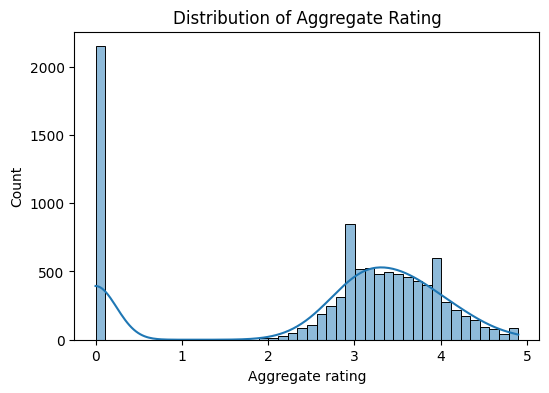

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["Aggregate rating"], kde=True)
plt.title("Distribution of Aggregate Rating")
plt.show()


### Drop columns

In [8]:
drop_cols = [
    "Restaurant ID", "Restaurant Name", "Address",
    "Locality", "Locality Verbose", "Rating color", "Rating text"
]

df = df.drop(columns=drop_cols)


### Encode Categorical Variables

In [9]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


### Split Features and Target

In [10]:
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Linear Regression Model

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [13]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R² Score:", r2_lr)


Linear Regression MSE: 1.586193416300755
Linear Regression R² Score: 0.30311183556940324


### Decision Tree Regressor

In [14]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


### Decision tree evolution

In [15]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R² Score:", r2_dt)


Decision Tree MSE: 0.17156985871271585
Decision Tree R² Score: 0.924621422153696


### model


In [16]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MSE": [mse_lr, mse_dt],
    "R2 Score": [r2_lr, r2_dt]
})

comparison


,Model,MSE,R2 Score
0,Linear Regression,1.586193,0.303112
1,Decision Tree,0.171570,0.924621


In [17]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
12,Votes,0.946556
2,Longitude,0.019040
3,Latitude,0.012306
4,Cuisines,0.010675
5,Average Cost for two,0.006456
1,City,0.002220
8,Has Online delivery,0.000911
11,Price range,0.000862
6,Currency,0.000474
7,Has Table booking,0.000418


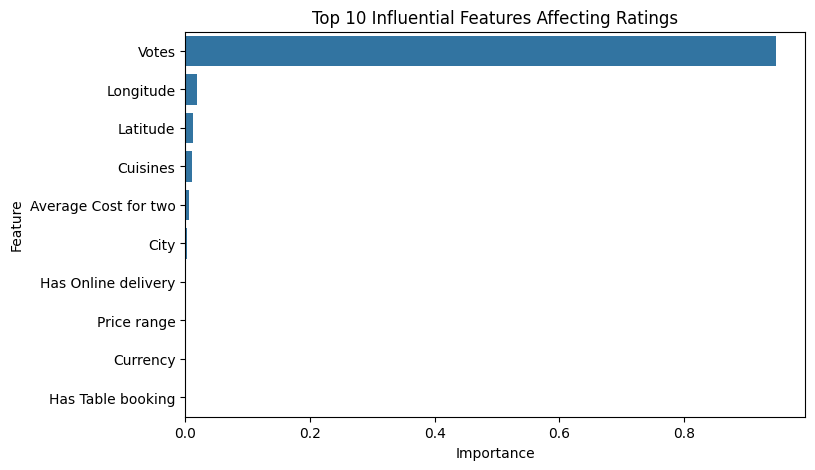

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Influential Features Affecting Ratings")
plt.show()


save this as a model

In [19]:
import pickle

# Save Decision Tree model
with open("model.pkl", "wb") as f:
    pickle.dump(dt, f)

print("Model saved successfully!")


Model saved successfully!


save column names 

In [20]:
# Save feature column names
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("Columns saved successfully!")


Columns saved successfully!
